In [11]:
from DATA import NARMA10

data = NARMA10(True, [60,0,40])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [13]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100, sparsity=0.9, ro_rescale=0.25)

ip_mask = IPMask.normalMask(100)

ip_reservoir.set_IP_mask(ip_mask)

In [16]:
ip_reservoir.pre_train(X_TR, eta=0.00025, epochs=2,  learning_rule="autodiff", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1362.8565673828125.
- Epoch: 2) | KL Divergence value: 1357.6820068359375.


In [17]:
ip_reservoir.predict(X_TR, False, True)

tensor([[ 0.1076,  0.0042,  0.0397,  ..., -0.0134, -0.0150,  0.0583],
        [ 0.0128,  0.0126,  0.0044,  ..., -0.0181, -0.0144,  0.0196],
        [ 0.0086,  0.0140, -0.0165,  ..., -0.0203, -0.0171,  0.0101],
        ...,
        [-0.1660, -0.0584,  0.2439,  ...,  0.5594,  0.1513, -0.2573],
        [-0.1217, -0.0491,  0.2166,  ...,  0.4913,  0.1269, -0.2075],
        [-0.0623, -0.0335,  0.1658,  ...,  0.3631,  0.0867, -0.1356]],
       grad_fn=<CopySlices>)

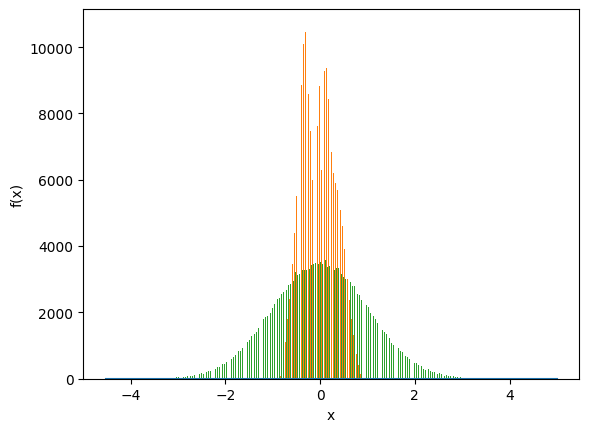

In [18]:
ip_reservoir.plot_overall_activation_distribution()

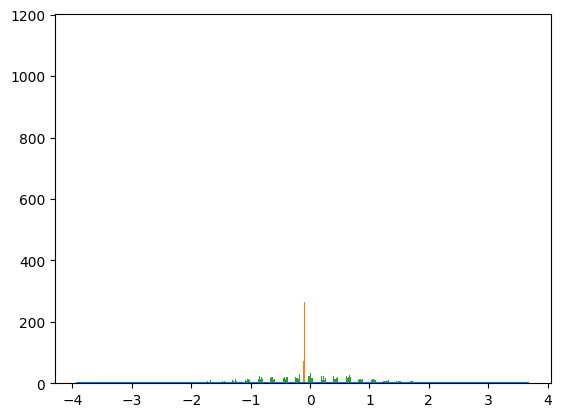

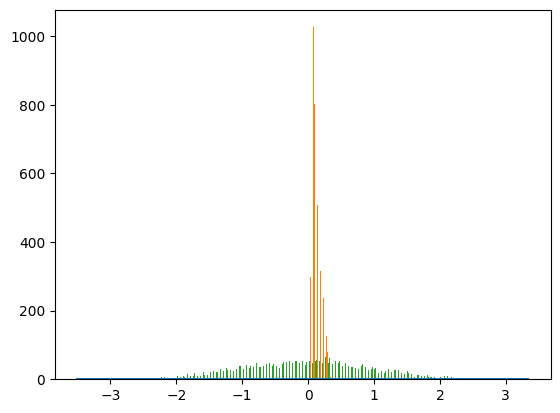

In [19]:
ip_reservoir.plot_local_neural_activity([1,4])

In [20]:
ip_reservoir.print_IP_stats([1,4])

Unit - (2): [ ACTUAL_MEAN == (-0.055831428617239)  ACTUAL_STD == (0.018921643495559692)][ TARGET_MEAN == (0.00385077646933496) TARGET_STD == (1.0191867351531982)]
Unit - (5): [ ACTUAL_MEAN == (0.12890635430812836)  ACTUAL_STD == (0.0670185312628746)][ TARGET_MEAN == (-0.018458573147654533) TARGET_STD == (0.9970900416374207)]
Overall network: [ACTUAL_MEAN == (-0.03136390820145607)  ACTUAL_STD == (0.35075753927230835)]


In [24]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.25)

No transient applied. Reservoir was already warmed up
torch.Size([6000])


[2.520652372326588, 0.005281183139463862, 0.30104936375288527]


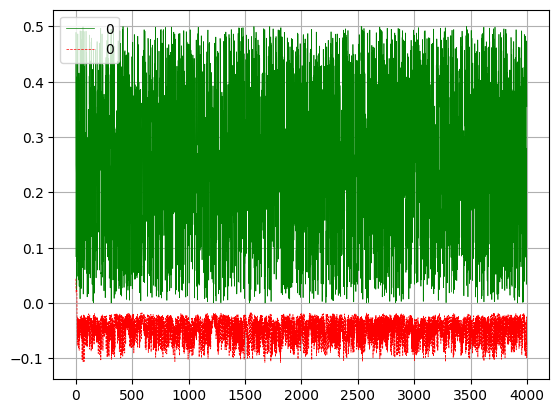

In [25]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [26]:
network.MC(X_TS)

1.2261509997472653